# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set base url that accesses my api key and jsonify it
BaseUrl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q=" + 'Atlanta'
requests.get(BaseUrl).json()

{'coord': {'lon': -84.388, 'lat': 33.749},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 74.1,
  'feels_like': 75.43,
  'temp_min': 72.39,
  'temp_max': 76.75,
  'pressure': 1020,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 140},
 'clouds': {'all': 0},
 'dt': 1659229260,
 'sys': {'type': 2,
  'id': 2006620,
  'country': 'US',
  'sunrise': 1659178079,
  'sunset': 1659227987},
 'timezone': -14400,
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

In [7]:
# # Establish variables to pull city data in sets of 50 and sleeping between to give the api a break.
# print("Beginning Data Retrieval\n")
# CityNumber = 1
# CityNumberRound = 1

# #Create a bunch of empty lists to fill data into to eventually build a DF with.
# citys = []
# lats = []
# longs = []
# temperatures = []
# humiditylevels = []
# cloudiness = []
# windspeed = []
# countries = []
# dates = []

# # For loop that loops through each city from the 605 length list above and appends all the weather attributes to the
# # empty lists. Try / except loop controls for cities not being found in the open weather map api. 
# for city in cities:
#     print(f'Processing record {CityNumber} of Set {CityNumberRound} | {city}')
#     try:
#         CityUrl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q=" + city
#         CityWeather = requests.get(CityUrl).json()
#         citys.append(CityWeather["name"])
#         lats.append(CityWeather["coord"]["lat"])
#         longs.append(CityWeather["coord"]["lon"])
#         temperatures.append(CityWeather["main"]["temp_max"])
#         humiditylevels.append(CityWeather["main"]["humidity"])
#         cloudiness.append(CityWeather["clouds"]["all"])
#         windspeed.append(CityWeather["wind"]["speed"])
#         countries.append(CityWeather["sys"]["country"])
#         dates.append(CityWeather["dt"])
#         CityNumber = CityNumber + 1
#         if CityNumber > 50:
#             CityNumber = 1
#             CityNumberRound = CityNumberRound + 1
#             time.sleep(50)
#     except:
#         print("City not found, skipping.")

Beginning Data Retrieval

Processing record 1 of Set 1 | pervomayskaya
Processing record 2 of Set 1 | busselton
Processing record 3 of Set 1 | lugovoy
Processing record 4 of Set 1 | provideniya
Processing record 5 of Set 1 | kodiak
Processing record 6 of Set 1 | pangkalanbuun
Processing record 7 of Set 1 | chum phae
Processing record 8 of Set 1 | belushya guba
City not found, skipping.
Processing record 8 of Set 1 | pauini
Processing record 9 of Set 1 | atuona
Processing record 10 of Set 1 | byron bay
Processing record 11 of Set 1 | birobidzhan
Processing record 12 of Set 1 | kagadi
Processing record 13 of Set 1 | lazaro cardenas
Processing record 14 of Set 1 | taolanaro
City not found, skipping.
Processing record 14 of Set 1 | bluff
Processing record 15 of Set 1 | albany
Processing record 16 of Set 1 | alindao
Processing record 17 of Set 1 | nome
Processing record 18 of Set 1 | nizhneyansk
City not found, skipping.
Processing record 18 of Set 1 | poum
Processing record 19 of Set 1 | b

Processing record 23 of Set 4 | puerto penasco
Processing record 24 of Set 4 | mwene-ditu
Processing record 25 of Set 4 | guarapari
Processing record 26 of Set 4 | solnechnyy
Processing record 27 of Set 4 | tibu
Processing record 28 of Set 4 | kibaya
Processing record 29 of Set 4 | port blair
Processing record 30 of Set 4 | bosaso
Processing record 31 of Set 4 | port moresby
Processing record 32 of Set 4 | lamu
Processing record 33 of Set 4 | grand gaube
Processing record 34 of Set 4 | poplar bluff
Processing record 35 of Set 4 | vanimo
Processing record 36 of Set 4 | avarua
Processing record 37 of Set 4 | aranos
Processing record 38 of Set 4 | nakhon si thammarat
Processing record 39 of Set 4 | araguacu
Processing record 40 of Set 4 | new norfolk
Processing record 41 of Set 4 | homer
Processing record 42 of Set 4 | helmsdale
Processing record 43 of Set 4 | coihaique
Processing record 44 of Set 4 | batie
Processing record 45 of Set 4 | norman wells
Processing record 46 of Set 4 | breda

Processing record 33 of Set 7 | isangel
Processing record 34 of Set 7 | turayf
Processing record 35 of Set 7 | puerto colombia
Processing record 36 of Set 7 | half moon bay
Processing record 37 of Set 7 | san isidro
Processing record 38 of Set 7 | sobolevo
Processing record 39 of Set 7 | launceston
Processing record 40 of Set 7 | kanata
Processing record 41 of Set 7 | bhatkal
Processing record 42 of Set 7 | aitape
Processing record 43 of Set 7 | ambilobe
Processing record 44 of Set 7 | kuala krai
City not found, skipping.
Processing record 44 of Set 7 | suntar
Processing record 45 of Set 7 | chillan
Processing record 46 of Set 7 | havre-saint-pierre
Processing record 47 of Set 7 | clyde river
Processing record 48 of Set 7 | broome
Processing record 49 of Set 7 | majene
Processing record 50 of Set 7 | daxian
City not found, skipping.
Processing record 50 of Set 7 | great falls
Processing record 1 of Set 8 | port hardy
Processing record 2 of Set 8 | fougamou
Processing record 3 of Set 8 

Processing record 9 of Set 11 | karaul
City not found, skipping.
Processing record 9 of Set 11 | felipe carrillo puerto
Processing record 10 of Set 11 | mednogorsk
Processing record 11 of Set 11 | hammerfest
Processing record 12 of Set 11 | sitka
Processing record 13 of Set 11 | port augusta
Processing record 14 of Set 11 | kushiro
Processing record 15 of Set 11 | santa cruz de tenerife
Processing record 16 of Set 11 | chelbasskaya
Processing record 17 of Set 11 | viligili
City not found, skipping.
Processing record 17 of Set 11 | kilindoni
Processing record 18 of Set 11 | ahipara
Processing record 19 of Set 11 | imeni poliny osipenko
Processing record 20 of Set 11 | morehead
Processing record 21 of Set 11 | katima mulilo
Processing record 22 of Set 11 | udaipur
Processing record 23 of Set 11 | munster
Processing record 24 of Set 11 | meyungs
City not found, skipping.
Processing record 24 of Set 11 | usinsk
Processing record 25 of Set 11 | baracoa
Processing record 26 of Set 11 | nango

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Create a dataframe for all the cities scanned above and populate the values for each column using a dictionary
CityDataPoints = pd.DataFrame({"City": citys,
            "Latitude": lats,
            "Longitude": longs,
            "Max Temperature": temperatures,
            "Humidity": humiditylevels,
            "Cloudiness": cloudiness,
            "Wind Speed": windspeed,
            "Country": countries,
            "Date": dates})
# When rerunning the code, I noticed it was generating an additional column at the beginning when I did to_csv
# as instructed in the Slack channel. But at first I thought it was happening here, so I tried to pop the column
# but the column didn't exist until I did to_csv I eventually learned, then used index = False to not bring it. 
# CityDataPoints.pop("Unnamed: 0")
CityDataPoints.head()





,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pervomayskaya,43.4033,45.5261,69.60,78,0,2.24,RU,1659230262
1,Busselton,-33.6500,115.3333,56.14,70,79,10.58,AU,1659230263
2,Lugovoy,42.9472,72.7644,67.53,50,8,5.10,KZ,1659230263
3,Provideniya,64.3833,-173.3000,53.53,65,98,6.31,RU,1659230263
4,Saint Paul Harbor,57.7900,-152.4072,62.11,72,100,9.22,US,1659230264


In [24]:
# Save the data to a csv file and then comment out the code above to keep the data static and support reruns. 
CityDataPoints.to_csv("weatherdata.csv",index=False)

In [25]:
# Read the csv file as a DF.

CityDataPointsDF = pd.read_csv("weatherdata.csv")
CityDataPointsDF.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pervomayskaya,43.4033,45.5261,69.60,78,0,2.24,RU,1659230262
1,Busselton,-33.6500,115.3333,56.14,70,79,10.58,AU,1659230263
2,Lugovoy,42.9472,72.7644,67.53,50,8,5.10,KZ,1659230263
3,Provideniya,64.3833,-173.3000,53.53,65,98,6.31,RU,1659230263
4,Saint Paul Harbor,57.7900,-152.4072,62.11,72,100,9.22,US,1659230264


In [26]:
CityDataPointsDF.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,18.476792,15.058560,68.955376,73.077064,54.737615,7.868716,1.659231e+09
std,33.828173,92.139717,13.536851,18.083993,41.015005,5.664760,2.414687e+02
min,-54.800000,-179.166700,34.410000,1.000000,0.000000,0.000000,1.659230e+09
25%,-8.619900,-68.300000,57.510000,64.000000,9.000000,3.560000,1.659230e+09
50%,21.444700,16.588700,71.620000,76.000000,68.000000,6.350000,1.659231e+09
75%,46.616600,101.082900,79.050000,86.000000,100.000000,11.180000,1.659231e+09
max,78.218600,178.416700,102.560000,100.000000,100.000000,28.390000,1.659231e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Max humidity above is 100.00%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

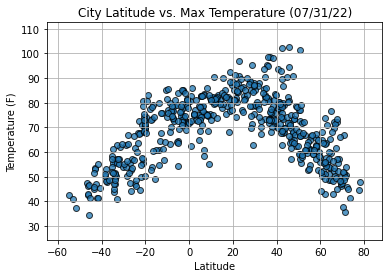

In [31]:
# Create a scatter plot to track latitude vs max temperature. Set the size, add a grid, and save a copy. 

plt.scatter(CityDataPointsDF['Latitude'],CityDataPointsDF['Max Temperature'],alpha=0.75,edgecolors='black')
plt.xlabel('Latitude') 
plt.ylabel('Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y')})")
plt.xlim(min(CityDataPointsDF['Latitude'])-10,max(CityDataPointsDF['Latitude'])+10)
plt.ylim(min(CityDataPointsDF['Max Temperature'])-10,max(CityDataPointsDF['Max Temperature'])+10)
plt.grid()
plt.savefig("Pictures/LatitudeVsMaxtemp.png")

# The code is analyzing the relationship between latitude and max temperature using a scatter plot.
# 0 latitude is the equator so it makes sense that as latitude approaches zero from both directions maximum temperatures rise.

## Latitude vs. Humidity Plot

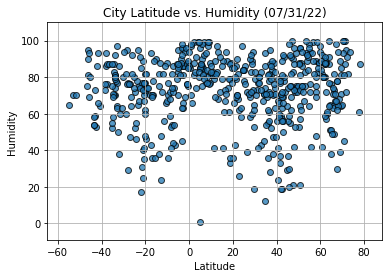

In [32]:
# Create a scatter plot to track latitude vs Humidity. Set the size, add a grid, and save a copy. 

plt.scatter(CityDataPointsDF['Latitude'],CityDataPointsDF['Humidity'],alpha=0.75,edgecolors='black')
plt.xlabel('Latitude') 
plt.ylabel('Humidity')
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y')})")
plt.xlim(min(CityDataPointsDF['Latitude'])-10,max(CityDataPointsDF['Latitude'])+10)
plt.ylim(min(CityDataPointsDF['Humidity'])-10,max(CityDataPointsDF['Humidity'])+10)
plt.grid()
plt.savefig("Pictures/LatitudeVsHumidity.png")

# The code is analyzing the relationship between latitude and Humidity using a scatter plot.
# High humidity seems to be the norm, but as you gain distance from the equator there grow pockets of low humidity.

## Latitude vs. Cloudiness Plot

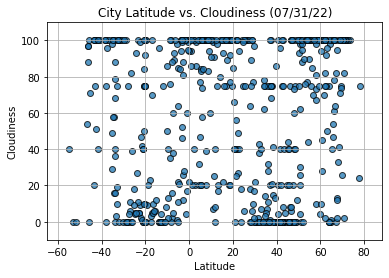

In [33]:
# Create a scatter plot to track latitude vs Cloudiness. Set the size, add a grid, and save a copy. 

plt.scatter(CityDataPointsDF['Latitude'],CityDataPointsDF['Cloudiness'],alpha=0.75,edgecolors='black')
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlim(min(CityDataPointsDF['Latitude'])-10,max(CityDataPointsDF['Latitude'])+10)
plt.ylim(min(CityDataPointsDF['Cloudiness'])-10,max(CityDataPointsDF['Cloudiness'])+10)
plt.grid()
plt.savefig("Pictures/LatitudeVsCloudiness.png")

# The code is analyzing the relationship between latitude and Cloudiness using a scatter plot.
# There doesn't seem to be as much of a relationship here as there was in previous graphs. The data is evenly spread out.

## Latitude vs. Wind Speed Plot

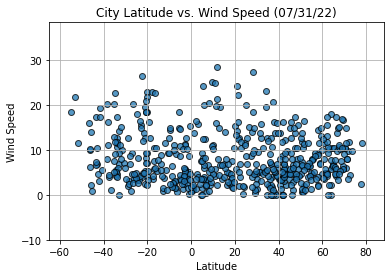

In [34]:
# Create a scatter plot to track latitude vs Wind Speed. Set the size, add a grid, and save a copy. 

plt.scatter(CityDataPointsDF['Latitude'],CityDataPointsDF['Wind Speed'],alpha=0.75,edgecolors='black')
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlim(min(CityDataPointsDF['Latitude'])-10,max(CityDataPointsDF['Latitude'])+10)
plt.ylim(min(CityDataPointsDF['Wind Speed'])-10,max(CityDataPointsDF['Wind Speed'])+10)
plt.grid()
plt.savefig("Pictures/LatitudeVsWindSpeed.png")

# The code is analyzing the relationship between latitude and Cloudiness using a scatter plot.
# Again, not a strong relationship to my eye. Near and south of the equator wind speed seems to be stronger.

## Linear Regression

In [40]:
# Separate my data frame into one for the Northern Hempisphere and one for Southern.

NorthHemDF = CityDataPointsDF.loc[CityDataPointsDF["Latitude"] >= 0]
SouthHemDF = CityDataPointsDF.loc[CityDataPointsDF["Latitude"] < 0]
# NorthHemDF.head()

# Since all values are measured against latitudes and I have to set X and Y values for lingress, declaring them here.
NorthY_Values = NorthHemDF["Latitude"]
SouthY_Values = SouthHemDF["Latitude"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

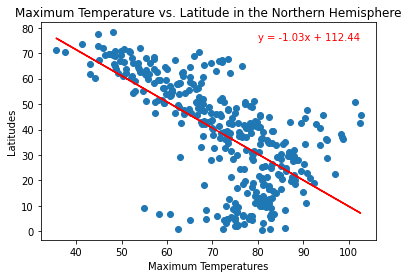

The r-value is: 0.41752647304788465.


In [92]:
# Now we are recreating the plots separated by hemisphere and adding linear regression data on top to show correlation.
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = NorthHemDF["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, NorthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,NorthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (80,75), color = "red")
plt.title("Maximum Temperature vs. Latitude in the Northern Hemisphere")
plt.xlabel("Maximum Temperatures")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# As latitude increases, maximum temperature decreases. This makes sense as New York is colder than Atlanta. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

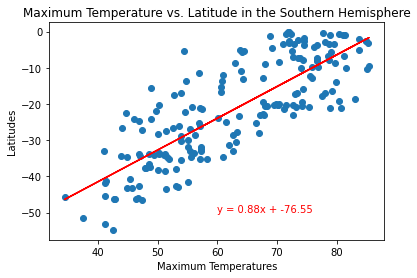

The r-value is: 0.6584332182419259.


In [93]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = SouthHemDF["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, SouthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,SouthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (60,-50), color = "red")
plt.title("Maximum Temperature vs. Latitude in the Southern Hemisphere")
plt.xlabel("Maximum Temperatures")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# These plots are just the first one from this notebook broken down in two since the equator is the point that
# reversal in the data. They show that as you approach the equator, maximum temperatures rise on average. Strong relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

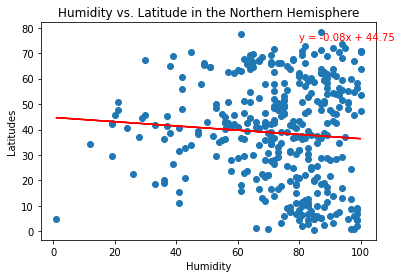

The r-value is: 0.005712016711491901.


In [94]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = NorthHemDF["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, NorthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,NorthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (80,75), color = "red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# There is really weak negative correlation here. Hard to say the variables are related. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

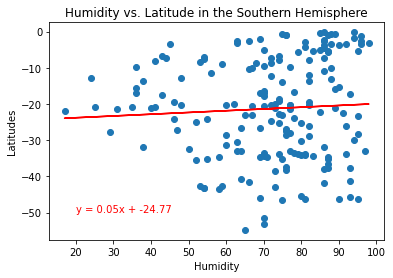

The r-value is: 0.003558829312063225.


In [95]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = SouthHemDF["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, SouthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,SouthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (20,-50), color = "red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# Similarly weak correlation but this time it's positive, which makes sense. These graphs imply there isn't much
# of a relationship between humidity and latitudes.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

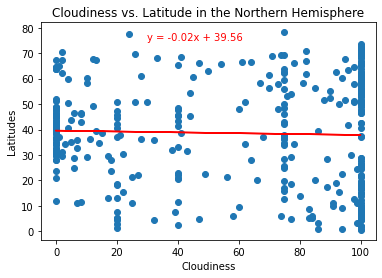

The r-value is: 0.0011703680207478333.


In [96]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = NorthHemDF["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, NorthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,NorthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (30,75), color = "red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# There is even weaker correlation between latitude and levels of cloudiness than with the other variables. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

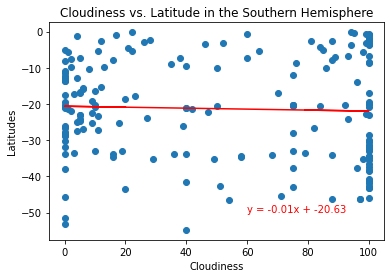

The r-value is: 0.0015621064618691338.


In [97]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = SouthHemDF["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, SouthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,SouthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (60,-50), color = "red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# These slopes and R values are showing that there is almost zero relationship between degrees of cloudiness and latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

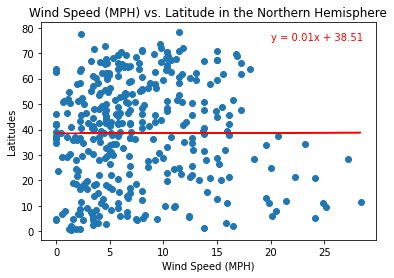

The r-value is: 6.7116427129980515e-06.


In [98]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = NorthHemDF["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, NorthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,NorthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (20,75), color = "red")
plt.title("Wind Speed (MPH) vs. Latitude in the Northern Hemisphere")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

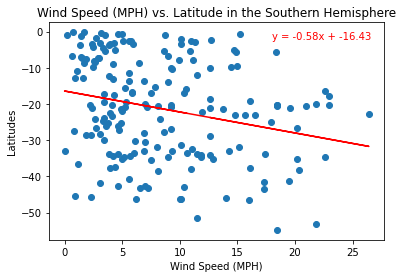

The r-value is: 0.062093874851595864.


In [99]:
# Set X Values, do the linear regression formula, Create the line of best fit, then place all of it onto a scatter plot.
X_Values = SouthHemDF["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, SouthY_Values)
regress_values = X_Values * slope + intercept
RSlope = round(slope,2)
RIntercept = round(intercept,2)
LineOfBestFit = f"y = {RSlope}x + {RIntercept}" 
RValueText = f"The r-value is: {rvalue**2}."
plt.scatter(X_Values,SouthY_Values)
# Adds the line to the graph, colors it red. Then adds the text to the plot. 
plt.plot(X_Values,regress_values,"r-")
plt.annotate(LineOfBestFit, xy = (18,-2), color = "red")
plt.title("Wind Speed (MPH) vs. Latitude in the Southern Hemisphere")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitudes")
plt.show()
print(RValueText)

# Interestingly, there is close to zero correlation in wind speed vs latitudes in the norhtern hemisphere, but there is 
# minor negative correlation between the two variables in the southern hemisphere.